In [2]:
# regression models to run?:
# linear regression
# XGBoost
# Neural Network
# Random Forest
# Ensemble

%matplotlib notebook

import os
from scipy import io
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA 
import pandas as pd
from sklearn.preprocessing import scale

In [3]:
# load data
%store -r X
%store -r Y

print(X.shape)
print(Y.shape)

(4908, 50)
(4908, 248)


In [4]:
# split into train and test, standardize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, TimeSeriesSplit

def kfolds(X, Y, model, k=3):
    
    kf = TimeSeriesSplit(n_splits=k)
    scores = []
    model = model
    
    for train_index, test_index in kf.split(X):
        # get data from kfold split
        X_Train, X_Test = X[train_index], X[test_index]
        Y_Train, Y_Test = Y[train_index], Y[test_index]

#         standardize
        X_Train = (X_Train - np.mean(X_Train, axis = 0)) / np.std(X_Train)
        X_Test = (X_Test - np.mean(X_Test, axis = 0)) / np.std(X_Test)

        Y_Train = (Y_Train - np.mean(Y_Train, axis = 0)) / np.std(Y_Train)
        Y_Test = (Y_Test - np.mean(Y_Test, axis = 0)) / np.std(Y_Test)

        # run regression
        score = model(X_Train, X_Test, Y_Train, Y_Test)
#         print(score)
        scores.append(score)
    avg = np.mean(scores)        
#     print("average", avg)
    return avg

In [5]:
# multiple linear regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

def linear(X_Train, X_Test, Y_Train, Y_Test):
    regressor = LinearRegression()
    regressor.fit(X_Train, Y_Train)
    Y_hat = regressor.predict(X_Test)
    score = regressor.score(X_Test, Y_Test)
    return score

def lasso(X_Train, X_Test, Y_Train, Y_Test):
    regressor = Lasso()
    regressor.fit(X_Train, Y_Train)
    Y_hat = regressor.predict(X_Test)
    score = regressor.score(X_Test, Y_Test)
    return score

def ridge(X_Train, X_Test, Y_Train, Y_Test):
    regressor = Ridge()
    regressor.fit(X_Train, Y_Train)
    Y_hat = regressor.predict(X_Test)
    score = regressor.score(X_Test, Y_Test)
    return score

def elasticnet(X_Train, X_Test, Y_Train, Y_Test):
    regressor = ElasticNet()
    regressor.fit(X_Train, Y_Train)
    Y_hat = regressor.predict(X_Test)
    score = regressor.score(X_Test, Y_Test)
    return score

In [6]:
# run PCA, see if improves

def PCA_predict(X, Y, model):
    PC_num = np.arange(1,248,1)
    scores = []
    for PC in PC_num:
        pca = PCA(n_components=PC).fit(Y)
        reduced_data = pca.transform(Y)
        scores.append(kfolds(X,reduced_data,model))
    return scores

<IPython.core.display.Javascript object>


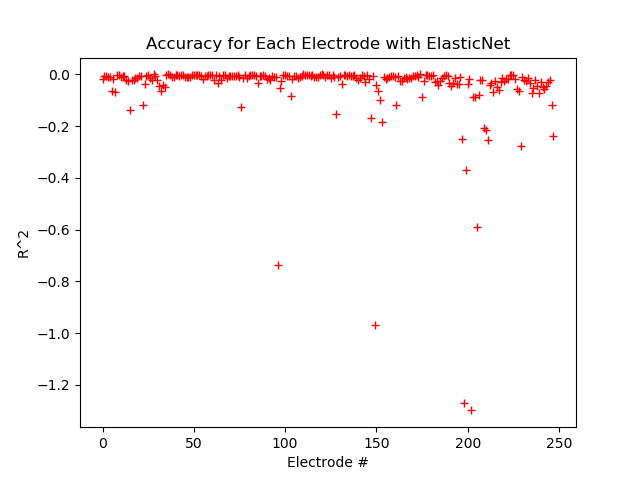

Text(0, 0.5, 'R^2')

In [28]:
# get R^2 for each individual electrode
models = [linear,lasso,ridge,elasticnet]

individual_scores = []
for i in np.arange(0,Y.shape[1],1):
    score = kfolds(X,Y[:,i], elasticnet)
    individual_scores.append(score)
    
plt.figure()
plt.plot(np.arange(0,Y.shape[1],1), individual_scores, 'r+')
plt.title("Accuracy for Each Electrode with ElasticNet")
plt.xlabel("Electrode #")
plt.ylabel("R^2")

<IPython.core.display.Javascript object>


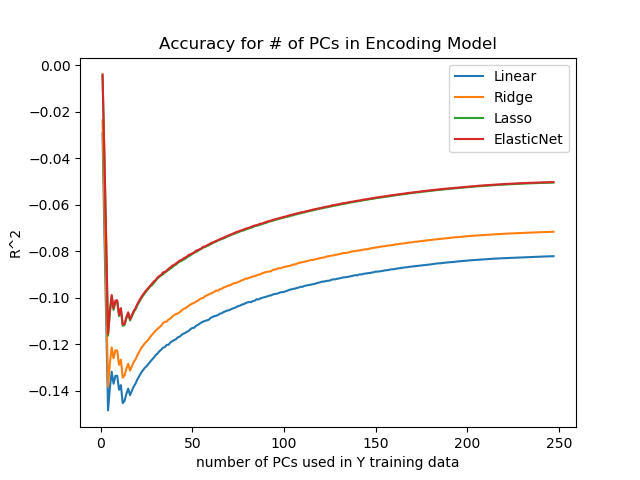

Text(0.5, 0, 'number of PCs used in Y training data')

In [16]:
models = [linear,ridge,lasso,elasticnet]
labels = ["Linear", "Ridge", "Lasso", "ElasticNet"]

plt.figure()
for model, label in zip(models, labels):
    PC_num = np.arange(1,248,1)
    scores = PCA_predict(X,Y,model)
    plt.plot(PC_num,scores,label=label)
plt.legend()
plt.title("Accuracy for # of PCs in Encoding Model")
plt.ylabel("R^2")
plt.xlabel("number of PCs used in Y training data")